In [1]:
# importing lib and setting a list of meshes to be tested
import sys 
import amfe
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook


# making the path relative to the project
local_folder = os.getcwd()[:]
os.chdir('..')
project_folder = os.getcwd()[:]
os.chdir(local_folder)
sys.path.append(r'project_folder')

mesh_inp = os.path.join(project_folder,r'data\ansys_simple_blade_disc_files\simple_blade_disc.inp')


m = amfe.Mesh()
m.import_inp(mesh_inp,1.0)

m.split_in_groups()

print(m.groups.keys())



Python was not able to load the fast fortran assembly routines.

Python was not able to load the fast fortran material routines.

*************************************************************

Loading Abaqus-mesh from C:\NDCSI\framework\data\ansys_simple_blade_disc_files\simple_blade_disc.inp
Can not read the given string list
WARNING 3D case were selected
Mesh C:\NDCSI\framework\data\ansys_simple_blade_disc_files\simple_blade_disc.inp successfully imported. 
Assign a material to a physical group.
*************************************************************
dict_keys(['SOLID_1_1_SOLID_ELSET', 'LOW_ELSET', 'HIGH_ELSET', 'DIRICHLET_ELSET', 'TOP_LOW_ELSET', 'TOP_HIGH_ELSET', 'TOP_ELSET', 'SOLID_1_1_ELSET'])


Element in mesh is not supported.
Element in mesh is not supported.
Element in mesh is not supported.
Element in mesh is not supported.
Element in mesh is not supported.
Element in mesh is not supported.
Element in mesh is not supported.
Element in mesh is not supported.


(-21.047588429999998,
 21.047588429999998,
 -21.047588429999998,
 21.047588429999998)

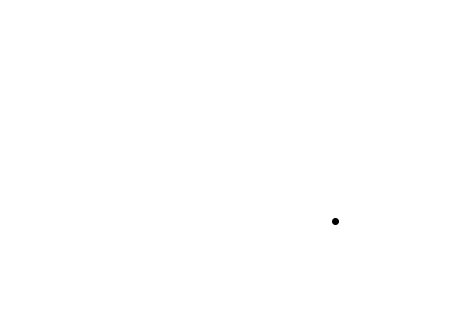

In [4]:
sub_domain = m.groups['SOLID_1_1_SOLID_ELSET']


ax = amfe.plot3Dmesh(m, ax=None, boundaries=True, alpha=0.2, color='blue', scale = 1000, plot_nodes=False)
ax.view_init(-90, 0)
#ax.set_aspect('equal', adjustable='box')
xlim = ax.get_xlim()
ax.set_ylim(xlim)
ax.set_zlim(xlim)
plt.axis('off')

In [5]:
my_comp = amfe.CraigBamptonComponent()
my_comp.set_mesh_obj(m)

my_material = amfe.KirchhoffMaterial(E=210E9, nu=0.3, rho=7.86E3, plane_stress=True, thickness=1.0)
my_comp.set_domain('SOLID_1_1_SOLID_ELSET',my_material)

K, f = my_comp.assembly_class.assemble_k_and_f()
K_, f = my_comp.assembly_class.assemble_k_and_f_neumann()
M = my_comp.assembly_class.assemble_m()

dirsub = m.get_submesh('phys_group', 'DIRICHLET_ELSET')
cyclic_low = m.get_submesh('phys_group', 'LOW_ELSET')
cyclic_high = m.get_submesh('phys_group', 'HIGH_ELSET')
cyclic_top_low = m.get_submesh('phys_group', 'TOP_LOW_ELSET')
cyclic_top_high = m.get_submesh('phys_group', 'TOP_HIGH_ELSET')

id_matrix = my_comp.assembly_class.id_matrix
dir_dofs = amfe.get_dirichlet_dofs(dirsub, direction ='xyz', id_matrix=id_matrix)
low_dofs = amfe.get_dirichlet_dofs(cyclic_low, direction ='xyz', id_matrix=id_matrix)
high_dofs = amfe.get_dirichlet_dofs(cyclic_high, direction ='xyz', id_matrix=id_matrix)
top_low_dofs = amfe.get_dirichlet_dofs(cyclic_top_low, direction ='xyz', id_matrix=id_matrix)
top_high_dofs = amfe.get_dirichlet_dofs(cyclic_top_high, direction ='xyz', id_matrix=id_matrix)


# remove Dirichle dofs at cyclic dofs 
dir_dofs = list(set(dir_dofs).difference(low_dofs))
dir_dofs = list(set(dir_dofs).difference(high_dofs))

# concatenating cyclic dofs
all_low_dofs =[]
all_low_dofs.extend(low_dofs)
all_low_dofs.extend(top_low_dofs)
all_high_dofs = []
all_high_dofs.extend(high_dofs)
all_high_dofs.extend(top_high_dofs)

Preallocating the stiffness matrix
Done preallocating stiffness matrix with 606 elements and 1716 dofs.
Time taken for preallocation: 0.03 seconds.


ValueError: cannot reshape array of size 21 into shape (8,3)

In [ ]:
sub_domain.get_element_type_list()